In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn import tree
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
cancer = datasets.load_breast_cancer()
# Check keys:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
cancer.data.shape

(569, 30)

In [4]:
cancer.target.shape

(569,)

In [5]:
np.unique(cancer.target)

array([0, 1])

In [6]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
print(df.shape)
# Add 'target' and 'diagnosis' keys 
df['target'] = cancer.target
df['diagnosis'] = np.array([cancer.target_names[i] for i in cancer.target]) 
#'malignant' is represented by 0 and 'benign' by 1
df[:5]

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


### Q1

In [8]:
# How many malignant cases do we have?
target = df['target']
q = np.where(target == 0)[0]
len(q)

212

In [9]:
# rate of malignant cases
round (len(q)/len(df), 2)

0.37

### Q2

In [10]:
X = cancer.data
y = cancer.target

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

build a decision tree and calculate its training accuracy when fitted to the entire data set:  

In [12]:
train_acc = []

for i in range(1,11):
    clf = tree.DecisionTreeClassifier(max_depth=i) # in this case tree is deterministic, so random_state is not needed
    clf = clf.fit(X, y)
    #tree.plot_tree(clf)
    train_acc.append(round(clf.score(X, y),4))

In [13]:
train_acc 

[0.9227, 0.942, 0.9789, 0.9824, 0.9947, 0.9982, 1.0, 1.0, 1.0, 1.0]

calculate the accuracy using 10-fold cross validation:

In [14]:
# a toy example
#data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
#kf = KFold(n_splits=3, random_state=4, shuffle=True)
#for i in range(3):
#    for train_index, test_index in kf.split(data):
#        print (train_index)
#        data_train   = X[train_index]
#        target_train = y[train_index]
#        print (test_index)
#        data_test    = X[test_index]
#        target_test  = y[test_index]

In [15]:
accuracies_CV = []
kf = KFold(n_splits=10, random_state=42, shuffle=True) # when splitting dataset, random_state needed

for i in range(1,11):
    accuracies_i = []
    for train_index, test_index in kf.split(X):
        data_train   = X[train_index]
        target_train = y[train_index]  
        data_test    = X[test_index]
        target_test  = y[test_index]

        clf = tree.DecisionTreeClassifier(max_depth=i) # random_state not needed
        clf.fit(data_train,target_train)
        preds = clf.predict(data_test)
        # accuracy of each fold    
        accuracy = accuracy_score(target_test, preds)
        accuracies_i.append(accuracy)

# average accuracy over all folds
    average_accuracy = round(np.mean(accuracies_i),4)
    accuracies_CV.append(average_accuracy)

print(accuracies_CV)

[0.884, 0.9209, 0.9367, 0.935, 0.9367, 0.9332, 0.9279, 0.9385, 0.9315, 0.9279]


visualization:

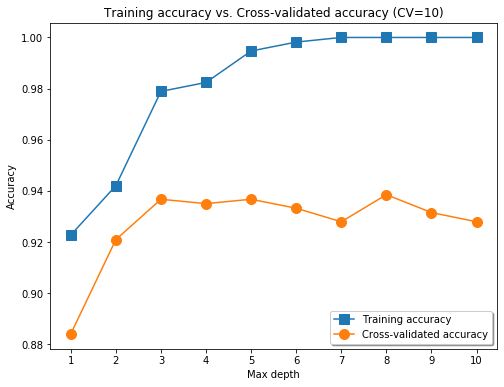

In [16]:
x_values = [i for i in range(1,11)]

fig = plt.figure(figsize=(8, 6))
plt.plot(x_values, train_acc, label='Training accuracy', marker='s', markersize=10)
plt.plot(x_values, accuracies_CV, label='Cross-validated accuracy', marker='o', markersize=10)

plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs. Cross-validated accuracy (CV=10)')
plt.legend(loc = 'lower right', 
                    shadow=True,
                    prop={'weight':'roman','size':'medium'})

plt.show()

When the max_depth = 9 we got the best accuracy among all the candidates.

reference: <br>
https://machinelearningmastery.com/k-fold-cross-validation/

### Q3

In [17]:
accuracies_CV2 = []
kf = KFold(n_splits=10, random_state=42, shuffle=True) # used same random_state for j

for j in range(1,21):
    accuracies_j = []
    for train_index, test_index in kf.split(X):
        data_train   = X[train_index]
        target_train = y[train_index]  
        data_test    = X[test_index]
        target_test  = y[test_index]

        clf_RF = RandomForestClassifier(n_estimators=j, max_depth=9, random_state=j) # random_state needed to specify RandomForest 
        clf_RF.fit(data_train,target_train)
        preds = clf_RF.predict(data_test)
        # accuracy of each fold    
        accuracy = accuracy_score(target_test, preds)
        accuracies_j.append(accuracy)

# average accuracy over all folds
    average_accuracy = round(np.mean(accuracies_j),4)
    accuracies_CV2.append(average_accuracy)

print(accuracies_CV2)

[0.9279, 0.9103, 0.9402, 0.9419, 0.9543, 0.9472, 0.949, 0.9614, 0.9456, 0.956, 0.9613, 0.9578, 0.9612, 0.9543, 0.9542, 0.9543, 0.9578, 0.9542, 0.956, 0.956]


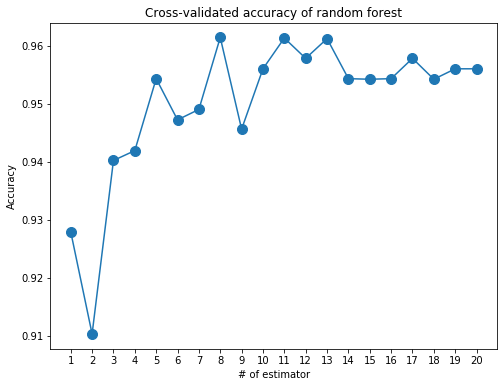

In [18]:
x_values2 = [i for i in range(1,21)]

fig = plt.figure(figsize=(8, 6))
plt.plot(x_values2, accuracies_CV2, marker='o', markersize=10)

plt.xticks(np.arange(min(x_values2), max(x_values2)+1, 1.0))
plt.xlabel('# of estimator')
plt.ylabel('Accuracy')
plt.title('Cross-validated accuracy of random forest')

plt.show()

The figure sees an improvement using random forests versus using a single tree.

### Q4

In [19]:
#fra = np.array([0.2,0.4,0.6,0.8]) # of test set

#def accuracies(m):
#    accuracies_fra = []
#    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=m, random_state=62)
#    for i in range(1,11):
#        clf = tree.DecisionTreeClassifier(max_depth=i,random_state=52)
#        clf.fit(X_train, y_train)
#        preds = clf.predict(X_test)     
#        accuracies_fra.append(round(accuracy_score(y_test, preds),4))
    
#    return accuracies_fra


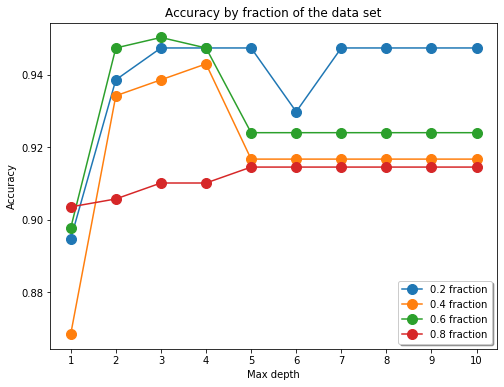

In [20]:
#x_values = [i for i in range(1,11)]
fig = plt.figure(figsize=(8, 6))

for m in np.array([0.2,0.4,0.6,0.8]):

    accuracies_fra = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=m, random_state=46)
    for i in range(1,11):
        clf = tree.DecisionTreeClassifier(max_depth=i, random_state=38) # random_state needed
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)     
        accuracies_fra.append(round(accuracy_score(y_test, preds),4))

    plt.plot(x_values, accuracies_fra, label="{per} fraction".format(per = m), marker='o', markersize=10)

plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Accuracy by fraction of the data set')
plt.legend(loc = 'lower right', 
                    shadow=True,
                    prop={'weight':'roman','size':'medium'})

plt.show()